In [6]:
import matplotlib.pyplot as plt
from pylab import rcParams

import networkx as nx
import scipy.io

import numpy as np
import scipy as sc

### Loading graph

In [96]:
mat = scipy.io.loadmat('data/minnesota.mat')

In [97]:
# Adjacency matrix
A = mat['A']

In [98]:
A.shape

(2642, 2642)

In [99]:
# Node attributes
features = mat['xy']
features

array([[-97.207,  49.001],
       [-96.801,  49.   ],
       [-95.957,  49.   ],
       ...,
       [-93.247,  43.5  ],
       [-93.353,  43.5  ],
       [-93.493,  43.499]])

In [100]:
G=nx.from_scipy_sparse_matrix(A)

In [101]:
def plot_graph(G, pos, vals=None, cmap=None, node_size=8):
    rcParams['figure.figsize'] = 10, 10
    if vals is not None:
        nx.draw(G, pos, node_color=vals, cmap=cmap, vmin=vals.min(), vmax=vals.max(), node_size=node_size)
    else:
        nx.draw(G, pos, node_size=node_size)
        
    plt.show()

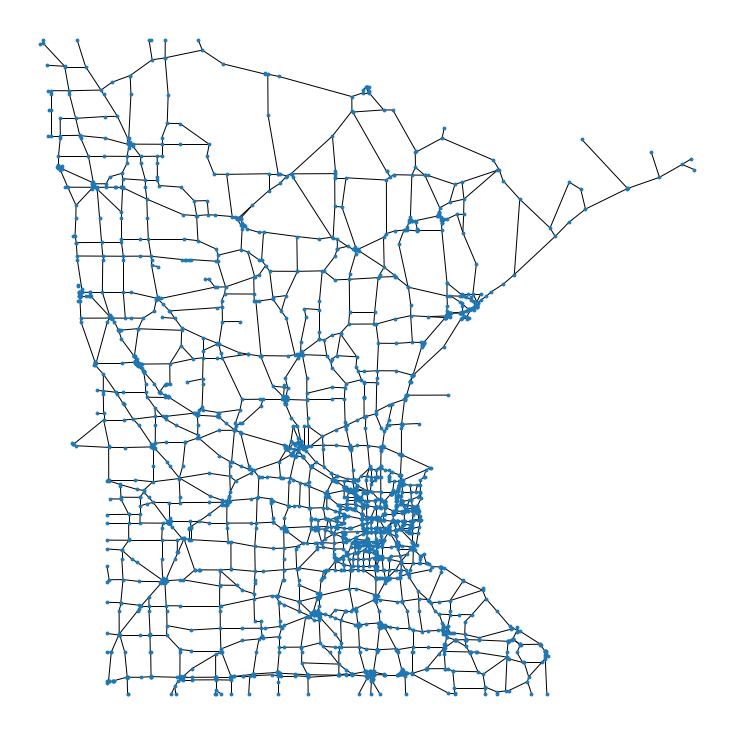

In [102]:
plot_graph(G, features)

### Sparsity of the adjacency matrix $A$

In [103]:
def show_sparsity(mat):
    rcParams['figure.figsize'] = 20, 20

    fig = plt.figure()
    ax1 = fig.add_subplot(221)

    ax1.spy(mat, precision=0.1, markersize=1)
    plt.show()

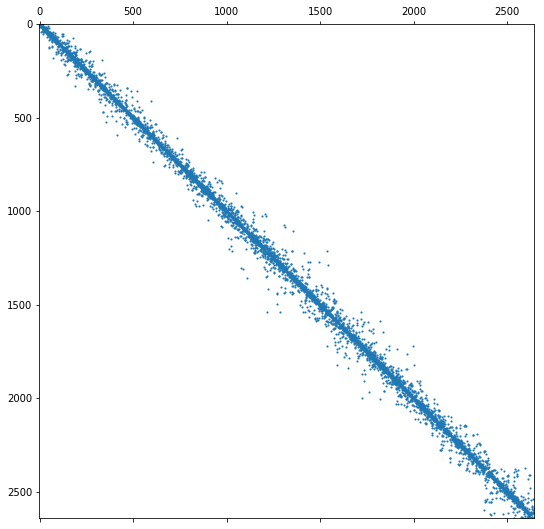

In [104]:
show_sparsity(A)

### Graph laplacian

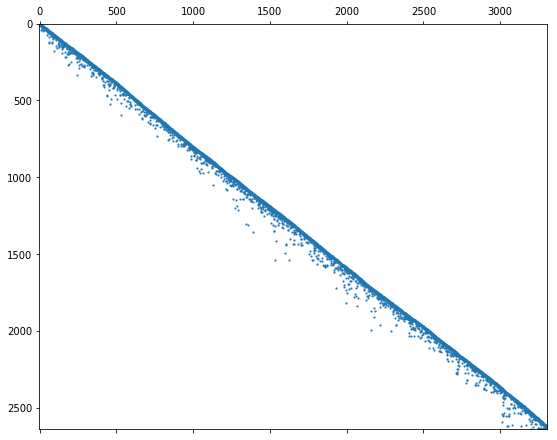

In [105]:
D = nx.incidence_matrix(G, oriented=True)
show_sparsity(D)
D=D*D.T

In [106]:
L = nx.linalg.laplacian_matrix(G, weight=None).astype(np.float)

In [107]:
L2 = (D - A).astype(np.float)

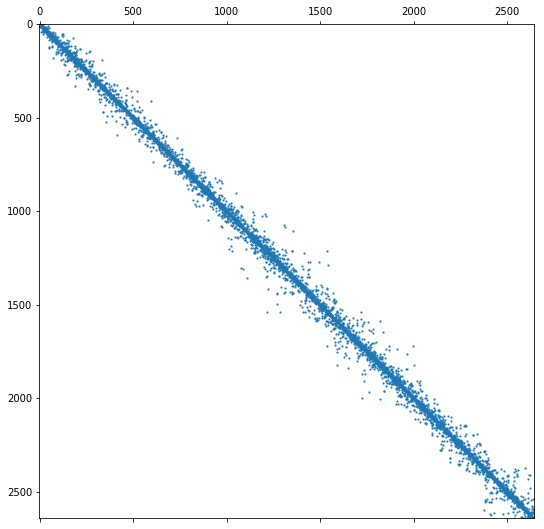

In [108]:
show_sparsity(L2)

# Fourier Transform

## Eigen value decomposition

In [109]:
!pip install block_timer
from block_timer.timer import Timer

In [110]:
# Sparse (Hermatian) computation, first K
with Timer('Sparse Hermatian'):
    theta, U = sc.sparse.linalg.eigsh(L, k=8, which='SM')
theta

[Sparse Hermatian] Total time 1.00012 seconds.


array([-2.78759217e-16, -1.74446451e-16,  8.44938594e-04,  2.07732544e-03,
        2.26491116e-03,  3.13178171e-03,  5.05011237e-03,  5.47885724e-03])

In [90]:
# Sparse (Hermatian) computation, not all possible
with Timer('Sparse Hermatian'):
    theta, U = sc.sparse.linalg.eigsh(L, k=L.shape[0]-1)
theta

[Sparse Hermatian] Total time 3.24843 seconds.


array([6.52299427e-03, 9.94785407e-03, 2.38414734e-02, ...,
       2.11540303e+01, 2.51076657e+01, 2.51320214e+01])

In [14]:
# Sparse computation, not all possible
with Timer('Sparse'):
    theta, U = sc.sparse.linalg.eigs(L, k=L.shape[0]-2)
theta

[Sparse] Total time 352.71338 seconds.


In [98]:
# Dense computation
with Timer('Dense'):
    theta, U = sc.linalg.eig(L.toarray())
theta

[Dense] Total time 21.09690 seconds.


In [116]:
# Dense (Hermatian) computation
with Timer('Dense Hermatian'):
    theta_full, U_full = sc.linalg.eigh(L.toarray())
theta_full

[Dense Hermatian] Total time 5.32649 seconds.


array([-1.54972223e-16,  1.57529412e-15,  8.44938594e-04, ...,
        6.65672619e+00,  6.73311834e+00,  6.87955442e+00])

## $U$ is not sparse

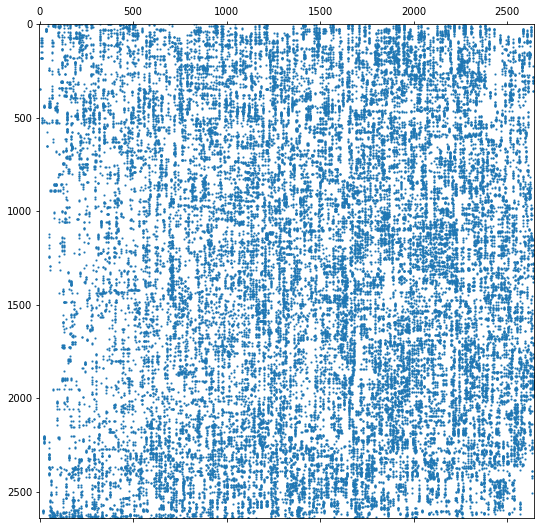

In [118]:
#plt.matshow(U_full)
show_sparsity(U_full)

### Eigen values

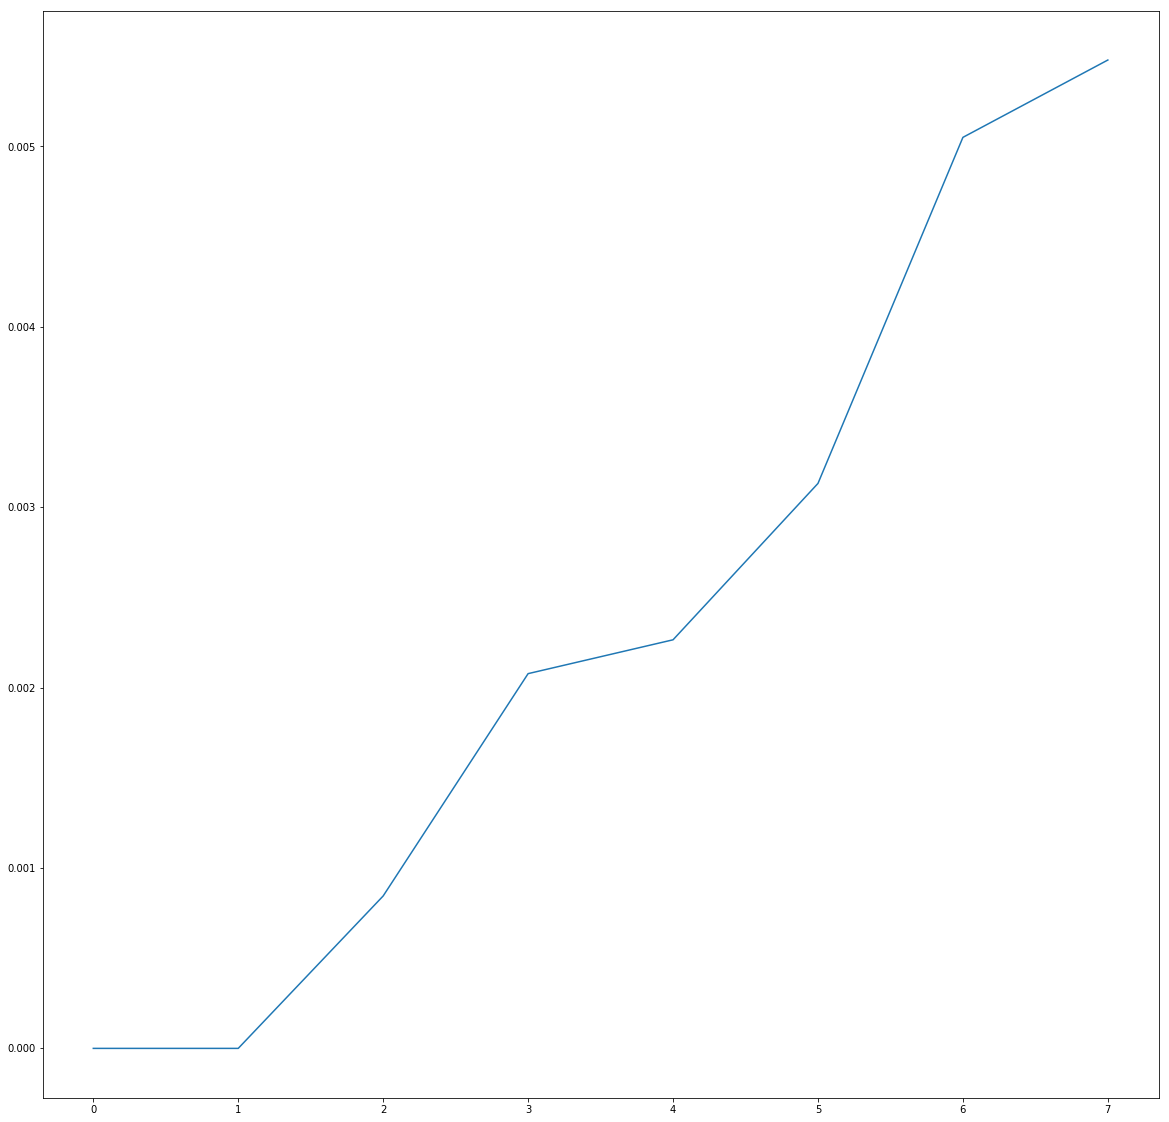

In [112]:
plt.plot(theta)
plt.show()

In [113]:
import seaborn as sns
# heatmap = plt.cm.get_cmap('hot')
heatmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

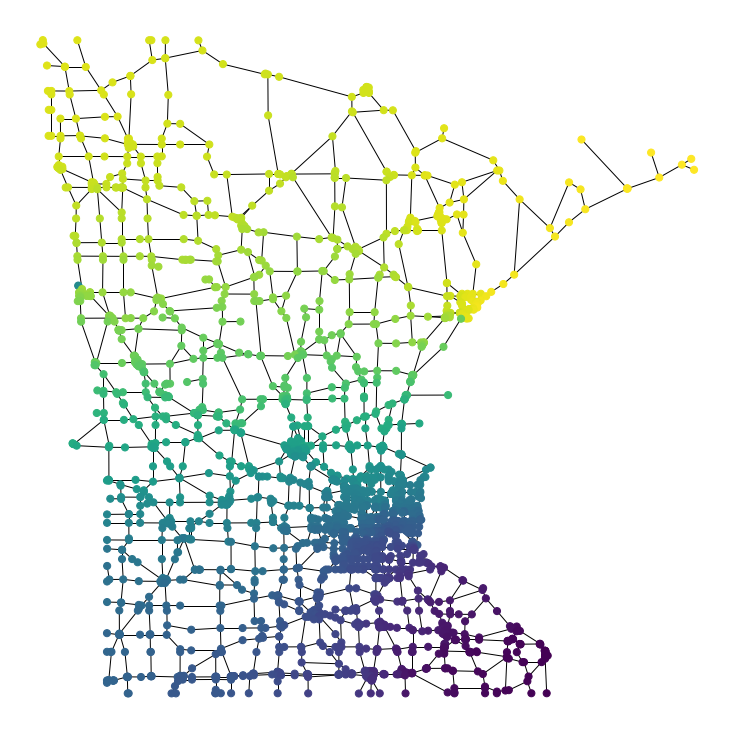

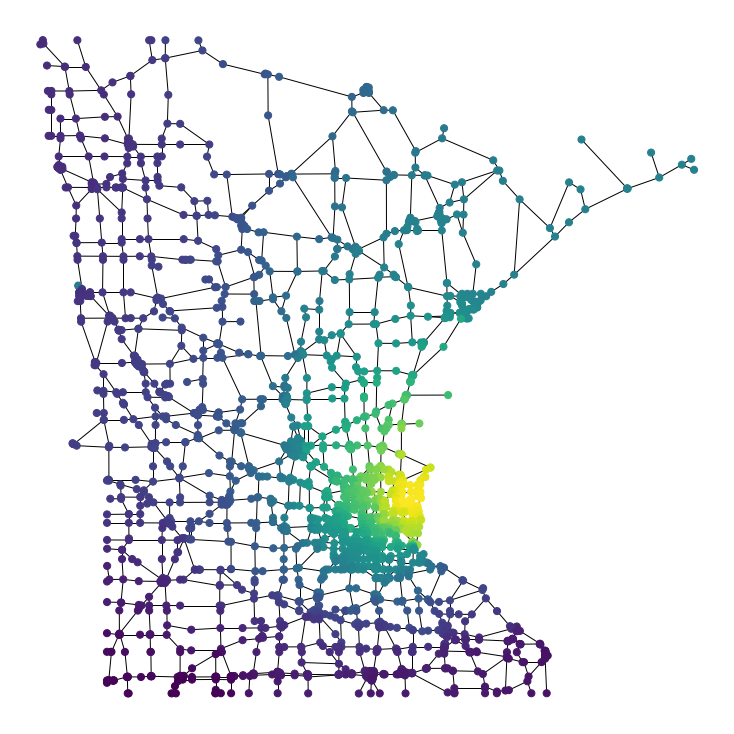

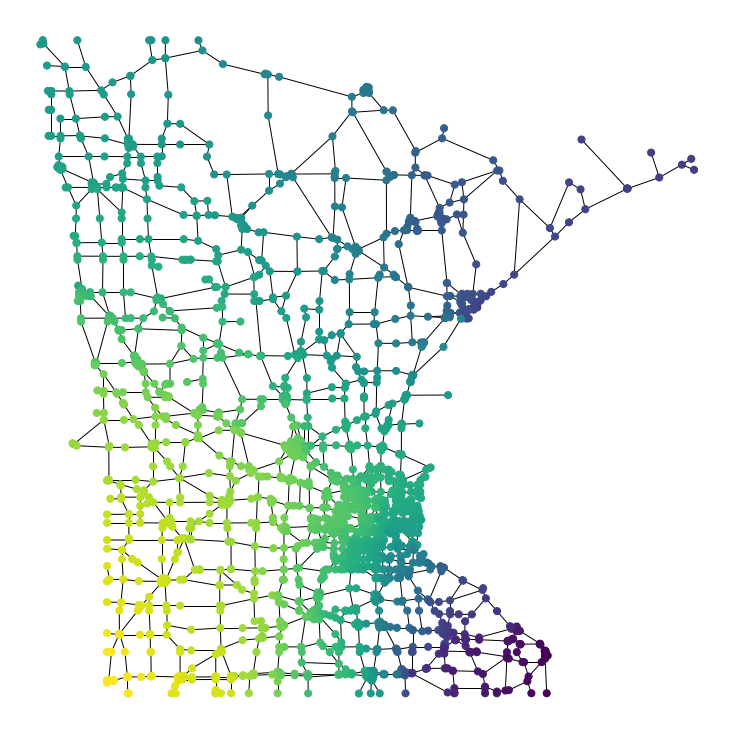

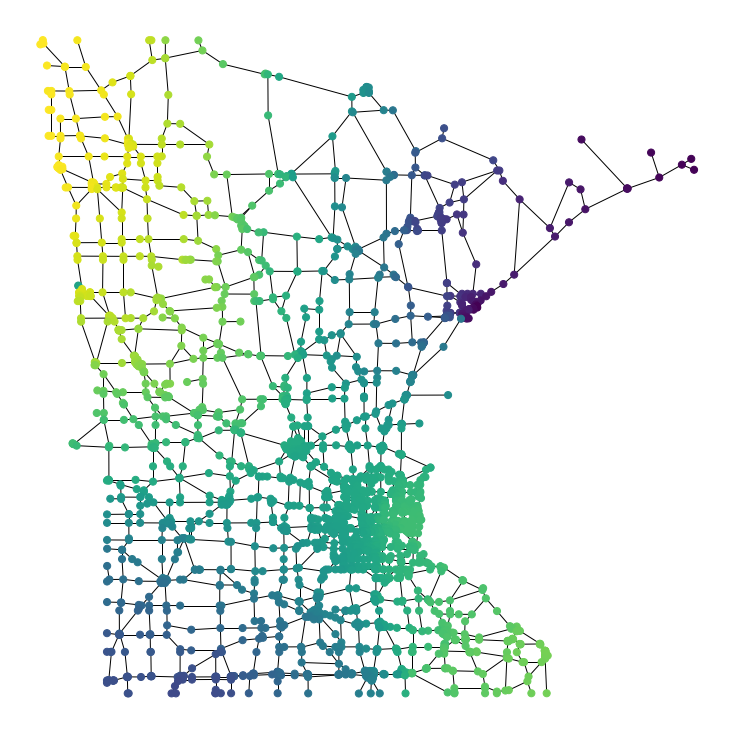

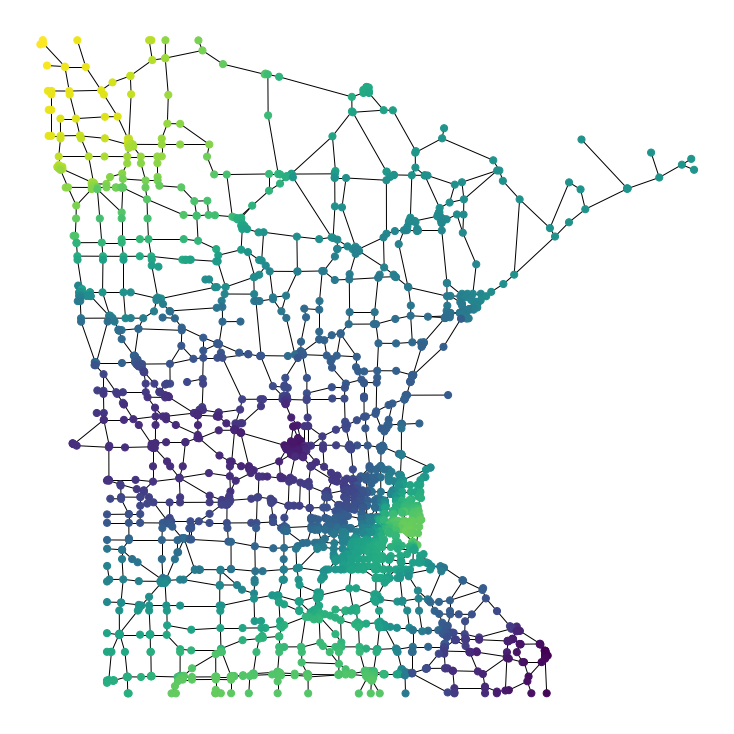

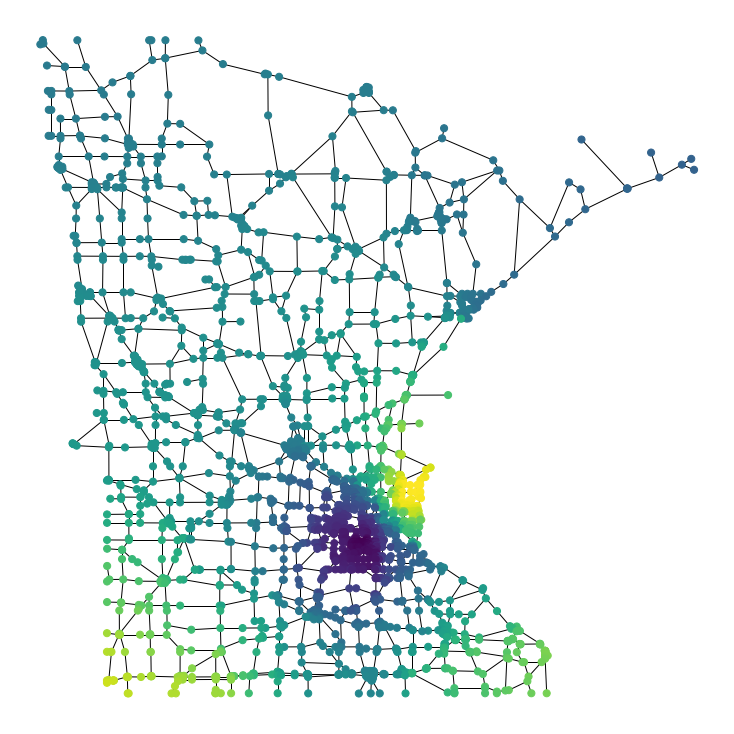

In [115]:
# fixme not ordered!!
for i in range(2,8):
    plot_graph(G, features, U[:, i], None, 50)
    plt.close()

## Fourier transform
The Laplacian is diagonalized by the Fourier basis $U \in \mathbb{R}^{n\times n}$

$L=U\Lambda U^T$

$U = [u_0, u_1, ..., u_{n-1}]$ - Orthonormal eigenvectors of $L$

$\Lambda = diag([\lambda_0, \lambda_1, ..., \lambda_{n-1}]) \in \mathbb{R}^{n\times n}$ - Real, non-negative eigenvalues

### Fourier transform from mesh vertices to spectral domain:

#### $x_\omega = U^T x$

Where $x \in \mathbb{R}^{n \times 3}$ is a signal on the graph

## Filtering

$y=g_\theta (L)x$

$g_\theta (L)$ parametric filter with learnable weights $\theta$


# Fast spectral convolutions

## Chebyshev polynomials